In [4]:
from matplotlib import font_manager, rc

font_path = '/Windows/Fonts/batang.ttc'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
import requests
import bs4


url = 'https://news.daum.net/'
res = requests.get(url)

# print(res.text)

soup = bs4.BeautifulSoup(res.text)
# print(soup)
# data = soup.select('a')
data = soup.find_all('a')
print(data)

[<a href="#mainContent">본문 바로가기</a>, <a href="#gnbContent">메뉴 바로가기</a>, <a class="link_daum" data-tiara-layer="gnb default logo" href="https://www.daum.net/">
<img alt="Daum" class="logo_daum" height="18" src="//t1.daumcdn.net/media/common/newsview_2021/pc/rtn/logo_daum.png" width="44"/>
</a>, <a data-tiara-layer="GNB service news" href="https://news.daum.net/" id="kakaoServiceLogo">
<span class="ir_wa">뉴스</span>
</a>, <a class="link_services" data-tiara-layer="enter" href="https://entertain.daum.net">연예</a>, <a class="link_services" data-tiara-layer="sports" href="https://sports.daum.net">스포츠</a>, <a class="link_gnb" data-tiara-layer="home" href="/"><span class="txt_gnb">홈</span></a>, <a class="link_gnb" data-tiara-layer="society" href="/society"><span class="txt_gnb">사회</span></a>, <a class="link_gnb" data-tiara-layer="politics" href="/politics"><span class="txt_gnb">정치</span></a>, <a class="link_gnb" data-tiara-layer="economic" href="/economic"><span class="txt_gnb">경제</span></a>, <

In [8]:
category_url = {
    '메인':['https://news.daum.net/'],
    '사회':['https://news.daum.net/society'],
    '정치':['https://news.daum.net/politics'],
    '경제':['https://news.daum.net/economic'],
    '국제':['https://news.daum.net/foreign'],
    '문화':['https://news.daum.net/culture'],
    'IT':['https://news.daum.net/digital']
}

In [9]:
for i, j in category_url.items():
    res = requests.get(j[0])
    j.append(res.text)

In [10]:
print(category_url)

{'메인': ['https://news.daum.net/', '\n<!DOCTYPE html>\n\n\n\n<html lang="ko" class="os_unknown none unknown version_0 ">\n<head>\n<meta charset="utf-8">\n<meta name="referrer" content="always" />\n\n<meta property="og:author" content="Daum 뉴스" />\n<meta property="og:site_name" content="다음뉴스" />\n<meta property="og:title" content="홈"/>\n<meta property="og:image" content="https://t1.daumcdn.net/media/img-media/mobile/meta/news.png" />\n<meta property="og:description" content="다음뉴스" />\n<meta property="og:url" content="https://news.daum.net/" />\n<link rel="shortcut icon" href="https://m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico">\n\n<title>홈 | 다음뉴스</title>\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n<link rel="stylesheet" type="text/css" href="//t1.daumcdn.net/media/kraken/news/5c015e8/style.css.merged.css" />\n<link rel="stylesheet" type="text/css" href="//t1.daumcdn.net/media/kraken/news/5c015e8/calendar.css.merged.css" />\n\n<!--[if lte IE 8]>\n<script src="https:/

In [12]:
temp = []
for i, j in category_url.items():
    soup = bs4.BeautifulSoup(j[1])
    
    for n in soup.find_all('span',attrs={'class':'info_cp'}):
        temp.append(n.text.strip())
        
    for n in soup.find_all('span',attrs={'class':'info_thumb'}):
        if n.find('a') == None:
            if '\n' in n.text.strip():
                temp.append(n.text.strip().split('\n')[0])
            elif n.text.strip() == '':
                temp.append(n.find('img',alt=True)['alt'])
            else:
                temp.append(n.text.strip())

In [14]:
print(temp)

['국제', '정치', '사회', '정치', '국제', '정치', '사회', '사회', '사회', '사회', '정치', '사회', '경제', '경제', '사회', '경제', '국제', '국제', '정치', '경제', '머니투데이', '노컷뉴스', '서울신문', 'YTN', '뉴스1', '대구MBC', '서울신문', '미디어오늘', '뉴스1', '뉴스1', '강원도민일보', '조선비즈', '뉴스1', '헬스조선', '노컷뉴스', '연합뉴스', '경향신문', '연합뉴스', '뉴시스', '뉴시스', '국제신문', '전주MBC', '문화일보', '연합뉴스', 'YTN', '서울신문', 'YTN', '연합뉴스TV', 'MBC', 'KBS', '한겨레', '경향신문', 'SBS', '데일리안', 'YTN', '연합뉴스', '이데일리', '뉴시스', '한국일보', '한겨레', 'YTN', '연합뉴스', '뉴시스', '매일경제', '뉴스1', '데일리안', '뉴스1', 'MBC', '연합뉴스', '뉴스1', 'kbc광주방송', 'SBS', '시사IN', '오마이뉴스', '서울신문', 'MBN', 'KBS', '채널A', '헤럴드경제', '뉴시스', '뉴스1', '뉴시스', 'KBS', '뉴시스', '연합뉴스', '뉴시스', '이데일리', '뉴시스', '연합뉴스', '국제신문', '전주MBC', '헤럴드경제', '헤럴드경제', '아시아경제', '한국경제', 'SBS', 'JTBC', '헤럴드경제', '한국경제TV', '서울경제', 'SBS Biz', '프레시안', 'YTN', '연합뉴스', '한겨레', '아시아경제', '서울신문', '뉴스1', '뉴시스', '연합뉴스', '헤럴드경제', '헤럴드경제', '뉴시스', '연합뉴스', '연합뉴스', '연합뉴스', '한겨레', '한겨레', '조선일보', '뉴시스', '서울신문', 'KBS', 'KBS', '서울신문', '오마이뉴스', 'JTBC', 'SBS Biz', 'KBS', '뉴시스', 'MBN', '서울신문', '뉴시스', '

In [15]:
print(category_url)

{'메인': ['https://news.daum.net/', '\n<!DOCTYPE html>\n\n\n\n<html lang="ko" class="os_unknown none unknown version_0 ">\n<head>\n<meta charset="utf-8">\n<meta name="referrer" content="always" />\n\n<meta property="og:author" content="Daum 뉴스" />\n<meta property="og:site_name" content="다음뉴스" />\n<meta property="og:title" content="홈"/>\n<meta property="og:image" content="https://t1.daumcdn.net/media/img-media/mobile/meta/news.png" />\n<meta property="og:description" content="다음뉴스" />\n<meta property="og:url" content="https://news.daum.net/" />\n<link rel="shortcut icon" href="https://m2.daumcdn.net/img-media/2010ci/Daum_favicon.ico">\n\n<title>홈 | 다음뉴스</title>\n\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n<link rel="stylesheet" type="text/css" href="//t1.daumcdn.net/media/kraken/news/5c015e8/style.css.merged.css" />\n<link rel="stylesheet" type="text/css" href="//t1.daumcdn.net/media/kraken/news/5c015e8/calendar.css.merged.css" />\n\n<!--[if lte IE 8]>\n<script src="https:/

In [21]:
temp_a = []

soup = bs4.BeautifulSoup(category_url['IT'][1])

for i in soup.find_all('span',attrs={'class':'info_thumb'}):
    if i.find('a') == None:
        print(i.text.strip())
        temp_a.append(i.text.strip())
print(temp_a)

헤럴드경제
한겨레
뉴시스
뉴스1
머니투데이
뉴시스
아이뉴스24
한국경제
조선비즈
조선일보
전자신문
한국경제
이데일리
아이뉴스24
전자신문
['헤럴드경제', '한겨레', '뉴시스', '뉴스1', '머니투데이', '뉴시스', '아이뉴스24', '한국경제', '조선비즈', '조선일보', '전자신문', '한국경제', '이데일리', '아이뉴스24', '전자신문']


In [24]:
# 언론사 리스트 저장용 변수
for i, j in category_url.items():
    soup = bs4.BeautifulSoup(j[1])
    
    temp = []

    for n in soup.find_all('span',attrs={'class':'info_cp'}):
        temp.append(n.text.strip())
        
    for n in soup.find_all('span',attrs={'class':'info_thumb'}):
        if n.find('a') == None:
            if '\n' in n.text.strip():
                temp.append(n.text.strip().split('\n')[0])
            elif n.text.strip() == '':
                temp.append(n.find('img',alt=True)['alt'])
            else:
                temp.append(n.text.strip())
                
    j.append(temp)

In [26]:
print(category_url['IT'][2])

['연합뉴스', '연합뉴스', '비즈니스워치', '조선비즈', '뉴스1', '지디넷코리아', '지디넷코리아', '머니투데이', '아이뉴스24', '지디넷코리아', '헤럴드경제', '한겨레', '뉴시스', '뉴스1', '머니투데이', '뉴시스', '아이뉴스24', '한국경제', '조선비즈', '조선일보', '전자신문', '한국경제', '이데일리', '아이뉴스24', '전자신문']


In [29]:
print(category_url['IT'][2])

['연합뉴스', '연합뉴스', '비즈니스워치', '조선비즈', '뉴스1', '지디넷코리아', '지디넷코리아', '머니투데이', '아이뉴스24', '지디넷코리아', '헤럴드경제', '한겨레', '뉴시스', '뉴스1', '머니투데이', '뉴시스', '아이뉴스24', '한국경제', '조선비즈', '조선일보', '전자신문', '한국경제', '이데일리', '아이뉴스24', '전자신문']


In [50]:
import wordcloud

text = ' '.join(category_url['IT'][2])
# print(text)
wc = wordcloud.WordCloud(font_path=font_path, background_color='white')
wc.generate_from_text(text)
wc.to_image()

OSError: cannot open resource

In [ ]:
import requests
import bs4


url = 'https://news.daum.net/'
res = requests.get(url)

In [40]:
# 모든 언론사 리스트
data = []
for i, j in category_url.items():
    if j != '메인':
        data.extend(j[2])
    
    unique_data = list(set(data))
    
print(unique_data)
    

['문화일보', '경제', '대전일보', '서울경제', 'SBS Biz', '지디넷코리아', '노컷뉴스', '비즈니스워치', '조선일보', '세계일보', 'YTN', '여성동아', 'kbc광주방송', '대구MBC', '뉴시스', 'SBS', '디지털타임스', '정치', 'JTBC', '오마이뉴스', '이데일리', '아시아경제', '한겨레', '데일리안', '한국일보', '프레시안', '사회', '서울신문', '국제', '머니투데이', 'MBN', '더스쿠프', '웨딩21뉴스', '미디어오늘', '헬스조선', '매일경제', '시사IN', '한국경제', '전주MBC', '코메디닷컴', 'MBC', '헤럴드경제', '강원도민일보', '메종', '투어코리아', '경향신문', '뉴스1', '한겨레21', '마리끌레르', '키즈맘', '한국경제TV', '조선비즈', 'KBS', '연합뉴스TV', '아이뉴스24', '연합뉴스', '전자신문', '채널A', '국제신문']


In [42]:
# 분야별 랭크
rank = {}
for i in unique_data:
    rank[i]=0
    
for i in category_url["IT"][2]:
    rank[i] += 1
    
print(rank)

{'문화일보': 0, '경제': 0, '대전일보': 0, '서울경제': 0, 'SBS Biz': 0, '지디넷코리아': 3, '노컷뉴스': 0, '비즈니스워치': 1, '조선일보': 1, '세계일보': 0, 'YTN': 0, '여성동아': 0, 'kbc광주방송': 0, '대구MBC': 0, '뉴시스': 2, 'SBS': 0, '디지털타임스': 0, '정치': 0, 'JTBC': 0, '오마이뉴스': 0, '이데일리': 1, '아시아경제': 0, '한겨레': 1, '데일리안': 0, '한국일보': 0, '프레시안': 0, '사회': 0, '서울신문': 0, '국제': 0, '머니투데이': 2, 'MBN': 0, '더스쿠프': 0, '웨딩21뉴스': 0, '미디어오늘': 0, '헬스조선': 0, '매일경제': 0, '시사IN': 0, '한국경제': 2, '전주MBC': 0, '코메디닷컴': 0, 'MBC': 0, '헤럴드경제': 1, '강원도민일보': 0, '메종': 0, '투어코리아': 0, '경향신문': 0, '뉴스1': 2, '한겨레21': 0, '마리끌레르': 0, '키즈맘': 0, '한국경제TV': 0, '조선비즈': 2, 'KBS': 0, '연합뉴스TV': 0, '아이뉴스24': 3, '연합뉴스': 2, '전자신문': 2, '채널A': 0, '국제신문': 0}


<function matplotlib.pyplot.show(close=None, block=None)>

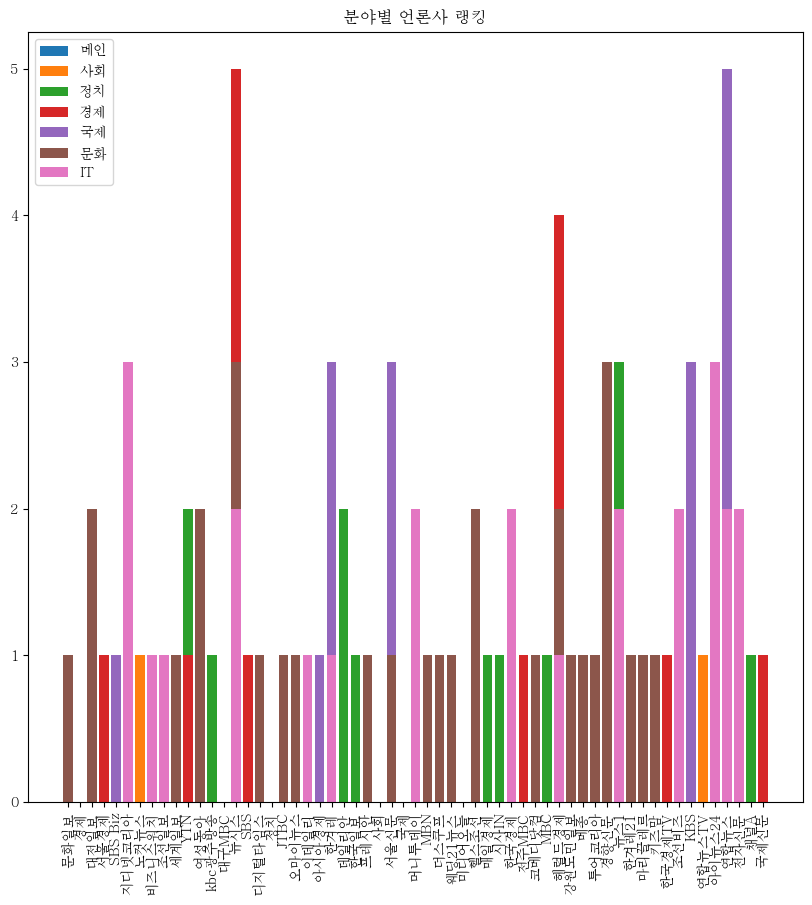

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))

for i in category_url.keys():
    rank={}
    
    for j in unique_data:
        rank[j] = 0
        
    for j in category_url[i][2]:
        if i == '메인':
            continue
        rank[j] += 1
        
    x = rank.keys()
    y = rank.values()
    plt.bar(x,y,label=i)

    
plt.xticks(rotation=90)
plt.legend()
plt.title('분야별 언론사 랭킹')
plt.show


In [54]:
# 전체 데이터 출력
print(data)

['국제', '정치', '사회', '정치', '국제', '정치', '사회', '사회', '사회', '사회', '정치', '사회', '경제', '경제', '사회', '경제', '국제', '국제', '정치', '경제', '머니투데이', '노컷뉴스', '서울신문', 'YTN', '뉴스1', '대구MBC', '서울신문', '미디어오늘', '뉴스1', '뉴스1', '강원도민일보', '조선비즈', '뉴스1', '헬스조선', '노컷뉴스', '연합뉴스', '경향신문', '연합뉴스', '뉴시스', '뉴시스', '국제신문', '전주MBC', '문화일보', '연합뉴스', 'YTN', '서울신문', 'YTN', '연합뉴스TV', 'MBC', 'KBS', '한겨레', '경향신문', 'SBS', '데일리안', 'YTN', '연합뉴스', '이데일리', '뉴시스', '한국일보', '한겨레', 'YTN', '연합뉴스', '뉴시스', '매일경제', '뉴스1', '데일리안', '뉴스1', 'MBC', '연합뉴스', '뉴스1', 'kbc광주방송', 'SBS', '시사IN', '오마이뉴스', '서울신문', 'MBN', 'KBS', '채널A', '헤럴드경제', '뉴시스', '뉴스1', '뉴시스', 'KBS', '뉴시스', '연합뉴스', '뉴시스', '이데일리', '뉴시스', '연합뉴스', '국제신문', '전주MBC', '헤럴드경제', '헤럴드경제', '아시아경제', '한국경제', 'SBS', 'JTBC', '헤럴드경제', '한국경제TV', '서울경제', 'SBS Biz', '프레시안', 'YTN', '연합뉴스', '한겨레', '아시아경제', '서울신문', '뉴스1', '뉴시스', '연합뉴스', '헤럴드경제', '헤럴드경제', '뉴시스', '연합뉴스', '연합뉴스', '연합뉴스', '한겨레', '한겨레', '조선일보', '뉴시스', '서울신문', 'KBS', 'KBS', '서울신문', '오마이뉴스', 'JTBC', 'SBS Biz', 'KBS', '뉴시스', 'MBN', '서울신문', '뉴시스', '

In [57]:
# 전체 랭킹
rank = {}

for i in data:
    if rank.get(i) == None:
        rank[i] = 1
    else:
        rank[i] += 1
    
print(rank)
    
   

{'국제': 4, '정치': 5, '사회': 7, '경제': 4, '머니투데이': 3, '노컷뉴스': 2, '서울신문': 8, 'YTN': 6, '뉴스1': 11, '대구MBC': 1, '미디어오늘': 1, '강원도민일보': 2, '조선비즈': 3, '헬스조선': 3, '연합뉴스': 16, '경향신문': 5, '뉴시스': 17, '국제신문': 2, '전주MBC': 2, '문화일보': 2, '연합뉴스TV': 1, 'MBC': 2, 'KBS': 6, '한겨레': 6, 'SBS': 3, '데일리안': 2, '이데일리': 3, '한국일보': 1, '매일경제': 1, 'kbc광주방송': 1, '시사IN': 1, '오마이뉴스': 3, 'MBN': 2, '채널A': 1, '헤럴드경제': 9, '아시아경제': 2, '한국경제': 3, 'JTBC': 3, '한국경제TV': 1, '서울경제': 1, 'SBS Biz': 2, '프레시안': 2, '조선일보': 3, '한겨레21': 1, '더스쿠프': 1, '여성동아': 2, '키즈맘': 1, '코메디닷컴': 1, '웨딩21뉴스': 1, '메종': 1, '투어코리아': 1, '마리끌레르': 1, '대전일보': 2, '세계일보': 1, '디지털타임스': 1, '비즈니스워치': 1, '지디넷코리아': 3, '아이뉴스24': 3, '전자신문': 2}


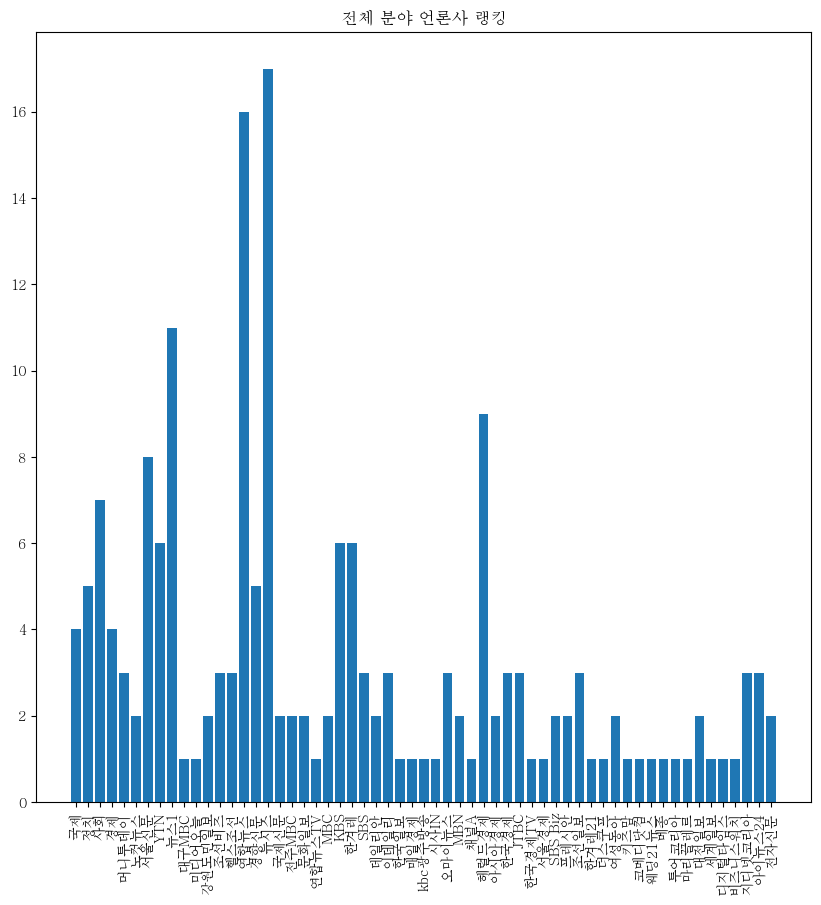

In [59]:
plt.figure(figsize=(10,10))

x = rank.keys()
y = rank.values()

plt.bar(x,y)

plt.xticks(rotation = 90)
plt.title('전체 분야 언론사 랭킹')
plt.show()

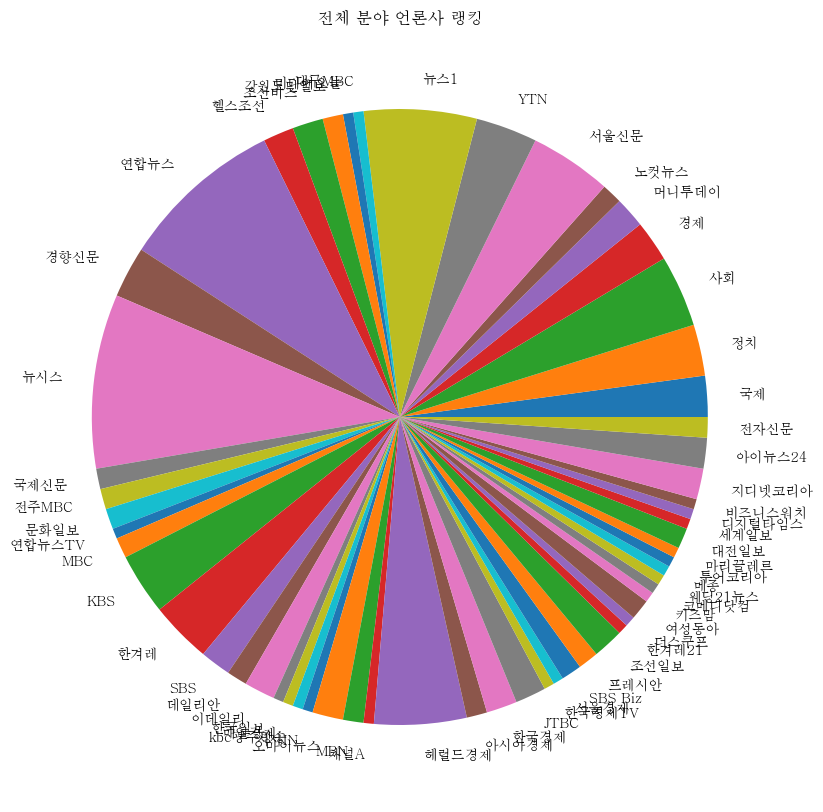

In [62]:
plt.figure(figsize=(10,10))

x = rank.keys()
y = rank.values()

plt.pie(y, labels=x)

plt.title('전체 분야 언론사 랭킹')
plt.show()